### 데이터 임포트

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin': # 오픈소스 유닉스 운영체제
    print ("유닉스")
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    print ("윈도우")
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

# 그래프 한글 깨짐 방지

윈도우


In [5]:
df = pd.read_csv('cansim.csv', skiprows=6, skipfooter=9, engine='python')

df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


             Unadjusted  Seasonally adjusted
Adjustments                                 
1991-01-31     12588862             15026890
1991-02-28     12154321             15304585
1991-03-31     14337072             15413591
1991-04-30     15108570             15293409
1991-05-31     17225734             15676083


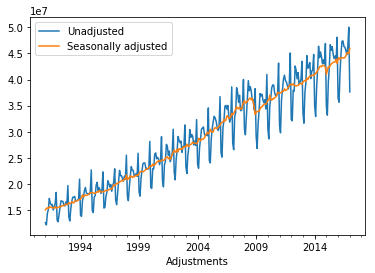

In [2]:
from pandas.tseries.offsets import MonthEnd

df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
print(df.head())
df.plot()

### 트레이닝셋 테스트셋 SPLIT

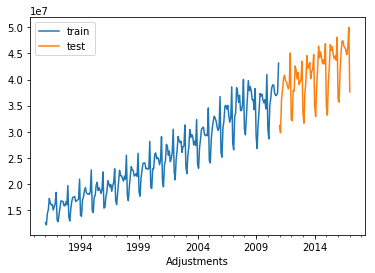

In [28]:
split_date = pd.Timestamp('01-01-2011')

train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

### 변수 Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526],
       [0.13173822],
       [0.20091289],
       [0.03002688],
       [0.01999285],
       [0.06596369],
       [0.10983126],
       [0.14912986],
       [0.14718865],
       [0.14464787],
       [0.11898427],
       [0.11802682],
       [0.14222108],
       [0.12459168],
       [0.24290801],
       [0.04899091],
       [0.02408276],
       [0.09865054],
       [0.14480155],
       [0.17061844],
       [0.17067229],
       [0.17603636],
       [0.1449117 ],
       [0.14957943],
       [0.15381982],
       [0.16036484],
       [0.28308682],
       [0.05971347],
       [0.05306762],
       [0.15199345],
       [0.17230214],
       [0.21246911],
       [0.23131079],
       [0.1982186 ],
       [0.19187716],
       [0.19381714],
       [0.18857277],
       [0.20528237],
       [0.339

### Pandas Dataframe 으로 변환

In [5]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


### pandas shift를 통해 Window 만들기
- shift는 이전 정보 다음 row에서 다시 쓰기 위한 pandas의 함수입니다. 이를 통해 아래와 같이 과거의 값들을 shift_s 와 같은 형태로 저장할 수 있습니다. 과거값은 총 12개를 저장하며, timestep은 12개가 됩니다. 우리의 목적은 과거값 shift1~12를 통해 현재값 Scaled를 예측하는 것입니다.

In [6]:
for s in range(1,13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
    
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


- 1991-01-31 ~ 1991-12-31 Scaled값을 보고 1992-01-31 예측
- 앞의 12개 이전값을 통해 다음 값 예측

In [7]:
train_sc_df.describe()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,240.000000,239.000000,238.000000,237.000000,236.000000,235.000000,234.000000,233.000000,232.000000,231.000000,230.000000,229.000000,228.000000
mean,0.420985,0.418563,0.416898,0.415272,0.413646,0.411940,0.410008,0.408054,0.406160,0.404522,0.403080,0.402519,0.401664
std,0.241028,0.238588,0.237695,0.236869,0.236042,0.235085,0.233712,0.232292,0.230983,0.230130,0.229584,0.229929,0.230070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.211260,0.210050,0.208841,0.207631,0.207044,0.206457,0.205870,0.205282,0.204648,0.204014,0.203380,0.202746,0.202611
50%,0.387050,0.383386,0.383247,0.383108,0.382566,0.382023,0.380370,0.378716,0.376887,0.375058,0.373580,0.372102,0.371540
75%,0.600857,0.599528,0.598398,0.597349,0.595715,0.593959,0.592390,0.591318,0.591266,0.590253,0.587838,0.589258,0.584998
max,1.000000,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722


### 트레이닝셋과 테스트셋 만들기
- dropna를 통해 NaN이 있는 데이터를 제거하고, shift_1 ~ shift_12는 X로 Scaled는 Y로 지정을 합니다.

In [8]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [9]:
X_train.tail()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
2010-08-31,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447,0.770968
2010-09-30,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447
2010-10-31,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687
2010-11-30,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290
2010-12-31,0.814829,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722


- 2010-08-31 row를 통해  2010-09-30 Scaled값 예측

In [10]:
y_train.tail()

,Scaled
Adjustments,
2010-08-31,0.814394
2010-09-30,0.799167
2010-10-31,0.802101
2010-11-30,0.814829
2010-12-31,1.000000


### 다시 ndarray로 변환하기
- 
데이터구조를 다시 ndarray로 변환시켜줍니다. 실제 deep learning 모델의 트레이닝과 테스트로 사용되는 데이터는 일반적으로 numpy의 ndarray입니다. 아래와 같이 .values를 통해 ndarray 값을 얻을 수 있습니다. 트레이닝 데이터는 timestep=12, size = 228 입니다.

In [11]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(228, 12)
[[0.20091289 0.13173822 0.11139526 ... 0.0704258  0.         0.01402033]
 [0.03002688 0.20091289 0.13173822 ... 0.09531795 0.0704258  0.        ]
 [0.01999285 0.03002688 0.20091289 ... 0.16362761 0.09531795 0.0704258 ]
 ...
 [0.79916654 0.81439355 0.86398323 ... 0.92972161 0.71629034 0.77368724]
 [0.80210057 0.79916654 0.81439355 ... 0.59734863 0.92972161 0.71629034]
 [0.81482896 0.80210057 0.79916654 ... 0.53166512 0.59734863 0.92972161]]
(228, 1)
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.17230214]
 [0.21246911]
 [0.23131079]
 [0.1982186 ]
 [0.19187716]
 [0.19381714]
 [0.18857277]
 [0.20528237]
 [0.33988685]
 [0.08949179]
 [0.07634802]
 [0.1

### 최종 트레이닝셋과 테스트셋의 X 만들기
- 이부분이 중요한데, keras에서는 RNN 계열의 모델을 트레이닝할 대 요구되는 데이터의 형식이 있습니다. 바로 3차원 데이터여야하며 각각의 차원은 (size, timestep, feature) 을 순서대로 나타내주어야하는 것입니다. 따라서 이 형태로 데이터를 reshape 해주어야합니다. 일반적인 MLP 모델에서는 size와 feature만 있기 때문에 2차원이지만, RNN에서는 "시간" 이라는 개념이 있기 때문에 차원이 한 차원 늘어나게 된 것입니다. 합리적인 데이터 구조라고 볼 수 있습니다.

In [12]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(228, 12, 1)
[[[0.20091289]
  [0.13173822]
  [0.11139526]
  ...
  [0.0704258 ]
  [0.        ]
  [0.01402033]]

 [[0.03002688]
  [0.20091289]
  [0.13173822]
  ...
  [0.09531795]
  [0.0704258 ]
  [0.        ]]

 [[0.01999285]
  [0.03002688]
  [0.20091289]
  ...
  [0.16362761]
  [0.09531795]
  [0.0704258 ]]

 ...

 [[0.79916654]
  [0.81439355]
  [0.86398323]
  ...
  [0.92972161]
  [0.71629034]
  [0.77368724]]

 [[0.80210057]
  [0.79916654]
  [0.81439355]
  ...
  [0.59734863]
  [0.92972161]
  [0.71629034]]

 [[0.81482896]
  [0.80210057]
  [0.79916654]
  ...
  [0.53166512]
  [0.59734863]
  [0.92972161]]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.172

### LSTM 모델 만들기
- 아래와 같이 keras를 통해 LSTM 모델을 만들 수 있습니다. input_shape=(timestep, feature)으로 만들어줍니다. size는 모델 설계시에는 중요하지 않으므로, feature, timestep만 모델에 알려주면 됩니다. 또 예측하고자하는 target의 갯수가 1이므로 마지막에 Dense(1)을 하나 추가해줍니다. 또한 실제 연속적인 값을 예측하는 것이기 때문에 loss function은 mean squared error가 됩니다. 또한 일반적으로 optimizer는 adam을 자주 사용합니다.

In [13]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(20, input_shape=(12, 1))) #(timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()



C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


### 모델 Fitting
- 모델을 Fitting한다는 것은 Training data set으로 optimization 과정을 통해 모델의 weight를 찾는 것입니다. early stopping 객체를 이용해 epoch마다 early stopping을 체크합니다. 아래와 같은 결과를 내면서 트레이닝이 잘 되는 것을 확인할 수 있습니다.

In [14]:
model.fit(X_train_t, y_train, epochs=100, batch_size=30, verbose=1)

Epoch 1/100
228/228 [==============================] - 1s 3ms/step - loss: 0.1730
Epoch 2/100
228/228 [==============================] - 0s 197us/step - loss: 0.0951
Epoch 3/100
228/228 [==============================] - 0s 201us/step - loss: 0.0434
Epoch 4/100
228/228 [==============================] - 0s 206us/step - loss: 0.0178
Epoch 5/100
228/228 [==============================] - 0s 206us/step - loss: 0.0162
Epoch 6/100
228/228 [==============================] - 0s 271us/step - loss: 0.0153
Epoch 7/100
228/228 [==============================] - 0s 206us/step - loss: 0.0125
Epoch 8/100
228/228 [==============================] - 0s 206us/step - loss: 0.0120
Epoch 9/100
228/228 [==============================] - 0s 192us/step - loss: 0.0112
Epoch 10/100
228/228 [==============================] - 0s 197us/step - loss: 0.0103
Epoch 11/100
228/228 [==============================] - 0s 214us/step - loss: 0.0096
Epoch 12/100
228/228 [==============================] - 0s 214us/step - loss

In [19]:
X_train_t.shape

(228, 12, 1)

In [20]:
y_train.shape

(228, 1)

### 학습된 모델을 통해 테스트셋 Test 하기
- 테스트셋은 2011/1/1 이후의 데이터를 나타냅니다. 트레이닝에는 1991년~ 2010년 까지 데이터가 이용되었기 때문에, 이 실습은 1991년~2010년 데이터를 통해 2011년 이후의 데이터를 예측하는 것으로 볼 수 있습니다.

In [15]:
print(X_test_t)

[[[1.06265011]
  [0.87180554]
  [0.84048091]
  [0.86220767]
  [0.88363094]
  [0.89302107]
  [0.92552046]
  [0.89993326]
  [0.83505683]
  [0.77259579]
  [0.56926634]
  [0.61423187]]

 [[0.65198848]
  [1.06265011]
  [0.87180554]
  [0.84048091]
  [0.86220767]
  [0.88363094]
  [0.89302107]
  [0.92552046]
  [0.89993326]
  [0.83505683]
  [0.77259579]
  [0.56926634]]

 [[0.6431242 ]
  [0.65198848]
  [1.06265011]
  [0.87180554]
  [0.84048091]
  [0.86220767]
  [0.88363094]
  [0.89302107]
  [0.92552046]
  [0.89993326]
  [0.83505683]
  [0.77259579]]

 [[0.83176496]
  [0.6431242 ]
  [0.65198848]
  [1.06265011]
  [0.87180554]
  [0.84048091]
  [0.86220767]
  [0.88363094]
  [0.89302107]
  [0.92552046]
  [0.89993326]
  [0.83505683]]

 [[0.82666946]
  [0.83176496]
  [0.6431242 ]
  [0.65198848]
  [1.06265011]
  [0.87180554]
  [0.84048091]
  [0.86220767]
  [0.88363094]
  [0.89302107]
  [0.92552046]
  [0.89993326]]

 [[0.98182284]
  [0.82666946]
  [0.83176496]
  [0.6431242 ]
  [0.65198848]
  [1.06265011]


- model.predict를 통해 테스트셋의 X에 대한 예측값 y_hat을 얻을 수 있습니다

In [16]:
y_pred = model.predict(X_test_t)
print(y_pred)

[[0.75794446]
 [0.77049917]
 [0.8575092 ]
 [0.88874096]
 [0.9120901 ]
 [0.9192311 ]
 [0.90623885]
 [0.90072435]
 [0.89384764]
 [0.8885017 ]
 [0.90074843]
 [0.9341025 ]
 [0.7955133 ]
 [0.81770426]
 [0.8933196 ]
 [0.9041324 ]
 [0.9566758 ]
 [0.9438028 ]
 [0.9252065 ]
 [0.93454474]
 [0.9105974 ]
 [0.9153721 ]
 [0.91958755]
 [0.93199813]
 [0.82446665]
 [0.8309925 ]
 [0.9167493 ]
 [0.9525779 ]
 [1.0081462 ]
 [0.98106486]
 [0.9844137 ]
 [0.98828393]
 [0.95575404]
 [0.97190803]
 [0.9714284 ]
 [0.9780844 ]
 [0.87113863]
 [0.87564665]
 [0.96124977]
 [1.0141093 ]
 [1.0621868 ]
 [1.0367236 ]
 [1.0457063 ]
 [1.0304261 ]
 [1.0133902 ]
 [1.0161599 ]
 [1.0005676 ]
 [1.0128294 ]
 [0.8801453 ]
 [0.8930685 ]
 [0.98839355]
 [1.0371293 ]
 [1.0877928 ]
 [1.0740533 ]
 [1.0775558 ]
 [1.0561728 ]
 [1.046461  ]
 [1.0483375 ]
 [1.0353519 ]
 [1.0577246 ]
 [0.9308505 ]]


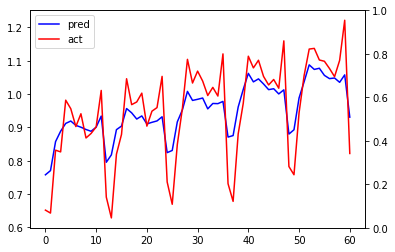

In [29]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
pred = y_pred
loss_ax.plot(pred, 'b', label='pred')
loss_ax.plot(y_test, 'r', label='act')
loss_ax.legend(loc='upper left')
plt.show()